In [2]:
#from jupyterthemes import get_themes
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme

#set_nb_theme('onedork')

In [4]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
#import jupyterthemes as jt

## Grilla vectorial

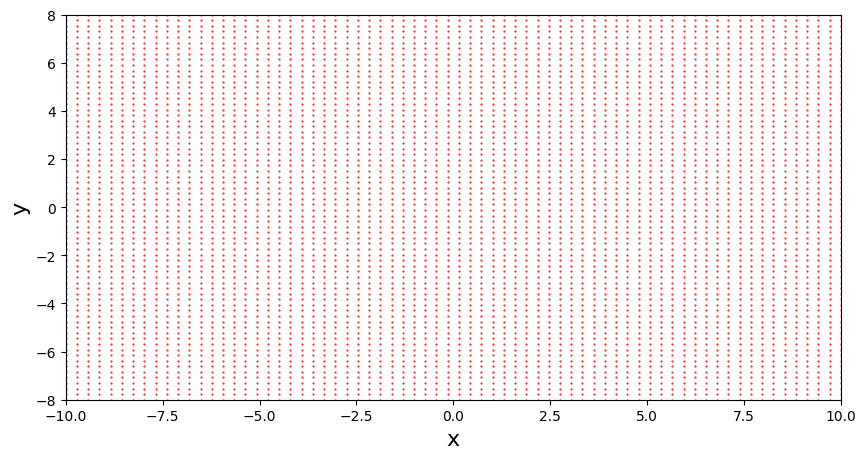

In [5]:
N=70 
x_start , x_end=-10,10
y_start, y_end=-8,8
#armo los array para x e y
x=np.linspace(x_start,x_end,N)
y=np.linspace(y_start,y_end,N)

X,Y =np.meshgrid(x,y) #arma la grilla con ambos arrays 1D

#grafico la grilla

plt.figure ( figsize =( 10 , 5 ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y
plt.scatter (X , Y , s =1 , color ="red", marker =".")

# Líneas de corriente

+ ## Caso traslacional 

$$u=\frac{\partial \psi}{\partial y}=U_{\infty}cos(\alpha)$$

$$v=-\frac{\partial \psi}{\partial x}=U_{\infty}sen(\alpha)$$

In [6]:
#Defino funciones
def get_velocity_traslacional(U,alfa):
	u=U*np.cos(alfa)*np.ones((N,N),dtype=float)
	v=U*np.sin(alfa)*np.ones((N,N),dtype=float)
	return u,v

def get_psi_traslacional(x,y,U,alfa):
	psi=Uinf*(y*np.cos(alfa)-x*np.sin(alfa))
	return psi

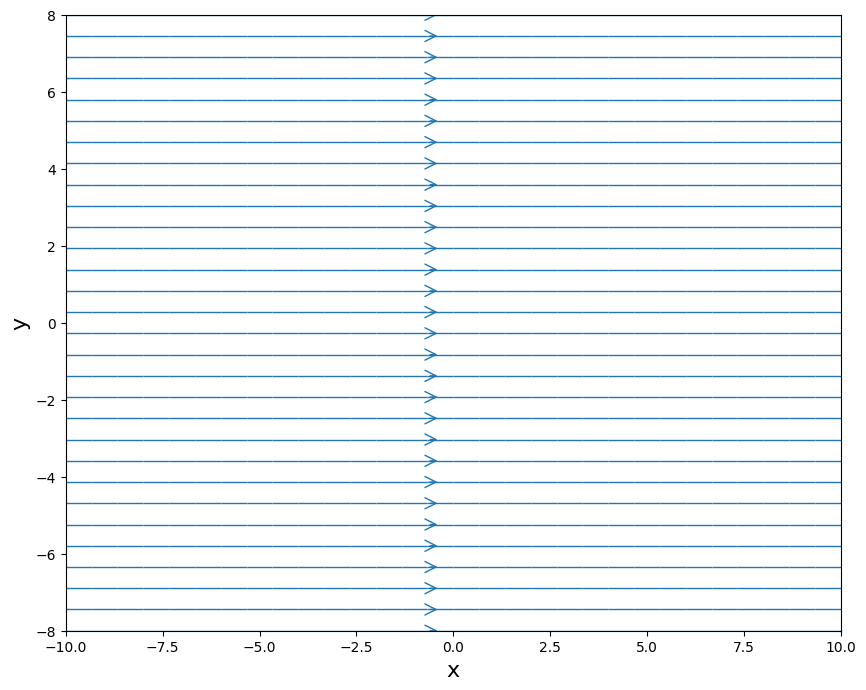

In [7]:
alfa=0
Uinf=1

u_tras,v_tras=get_velocity_traslacional(Uinf,alfa)

psi_tras=get_psi_traslacional(X,Y,Uinf,alfa)

#Ploteo el campo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_tras , v_tras ,
density =1 , linewidth =1 , arrowsize =2 , arrowstyle ="->")


+ ##  Caso Fuente/Sumidero

$$u=\frac{\partial \psi}{\partial y}=\frac{\sigma}{2\pi}\frac{x}{x^2+y^2}$$

$$v=-\frac{\partial \psi}{\partial x}=\frac{\sigma}{2\pi}\frac{y}{x^2+y^2}$$

+ Donde $\sigma$ es la intensidad de la fuente


In [8]:
#Defirno funciones

def get_velocity_source(x,y,x0,y0,sigma):

#Escribo el campo de velocidades
	u=sigma/(2*np.pi)*(x-x0)/((x-x0)**2+(y-y0)**2)
	v=sigma/(2*np.pi)*(y-y0)/((x-x0)**2+(y-y0)**2)
	return u,v

def get_psi_source(x,y,x0,y0,sigma):
	psi=sigma/(2*np.pi)*np.arctan2((y-y0),(x-x0))
	return psi

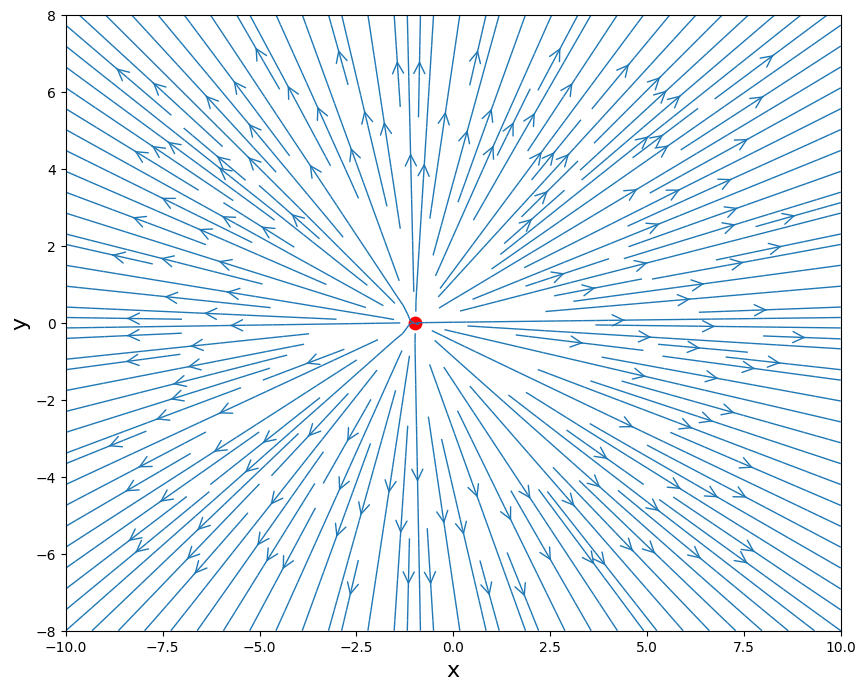

In [9]:
sigma_fuente=5 
X_fuente, Y_fuente= -1.0, 0.0

u_fuente, v_fuente = get_velocity_source(X,Y,X_fuente,Y_fuente,sigma_fuente)

psi_fuente=get_psi_source(X,Y,X_fuente,Y_fuente,sigma_fuente)
#Ploteo el campo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_fuente , v_fuente ,
density =2 , linewidth =1 , arrowsize =2 , arrowstyle ="->")
plt.scatter ( X_fuente , Y_fuente ,
color = "Red", s=80 , marker ="o");


In [10]:
#Defino funcion

def get_velocity_vortex(x,y,x0,y0,gamma):
	u=-gamma/(2*np.pi)*(y-y0)/((x-x0)**2+(y-y0)**2)
	v=gamma/(2*np.pi)*(x-x0)/((x-x0)**2+(y-y0)**2)
	return u,v

def get_psi_vortex(x,y,x0,y0,gamma):
	psi=-gamma/(2*np.pi)*np.log(np.sqrt((x-x0)**2+(y+y0)**2))
	return psi

+ ## Caso Vórtice 

$$u=\frac{\partial \psi}{\partial y}=-\frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}$$

$$v=-\frac{\partial \psi}{\partial x}=\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

+ Donde $\Gamma$ es la circulación del vórtice

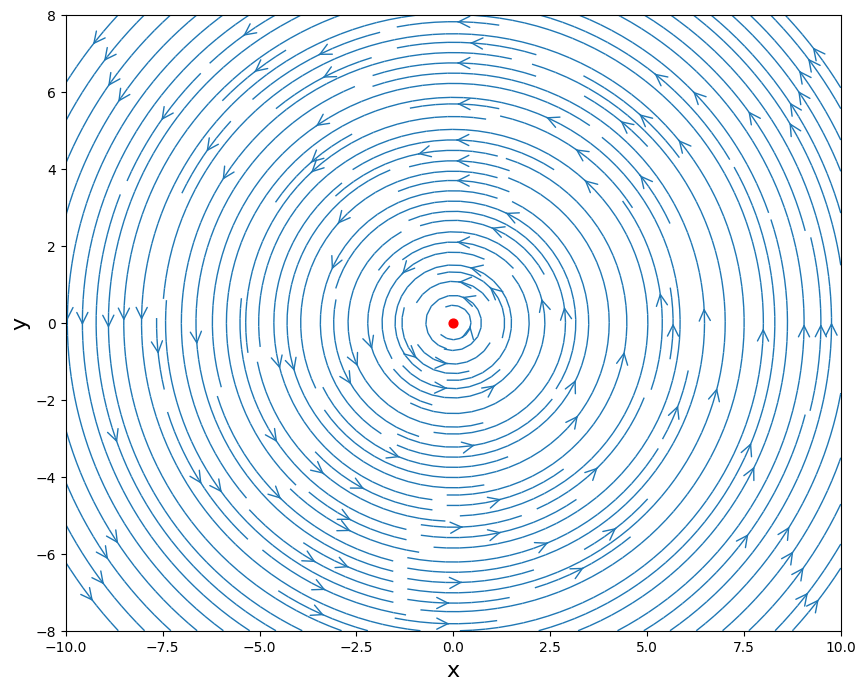

In [11]:
 
X_vort, Y_vort= 0.0, 0.0
w=0.3
a=5
gamma=2*np.pi*w*a**2
u_vort,v_vort= get_velocity_vortex(X,Y,X_vort,Y_vort,gamma)

psi_vort=get_psi_vortex(X,Y,X_vort,Y_vort,gamma)
#Ploteo el campo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_vort , v_vort ,
density =2 , linewidth =1 , arrowsize =2 , arrowstyle ="->")
plt.scatter ( X_vort , Y_vort ,
color = "Red", s=40 , marker ="o");


+ ## Caso Doble Vortice separado

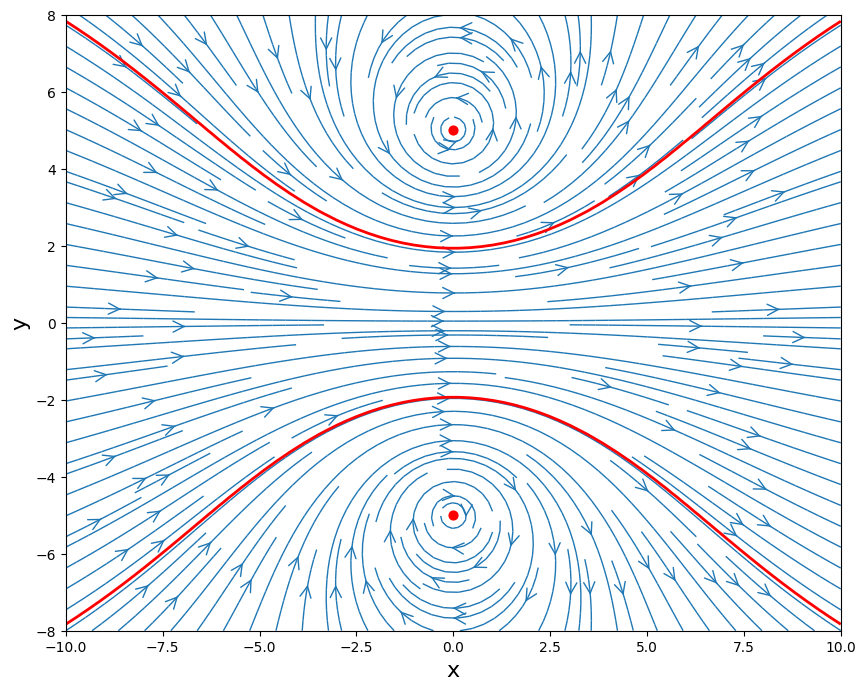

In [12]:
X_vort1, Y_vort1=0.0, 5.0
X_vort2, Y_vort2=0.0,-5.0

w=1
a=4
gamma1=2*np.pi*w*a**2
gamma2=-gamma1

u_vort1,v_vort1= get_velocity_vortex(X,Y,X_vort1,Y_vort1,gamma1)
u_vort2,v_vort2= get_velocity_vortex(X,Y,X_vort2,Y_vort2,gamma2)

u_vort_total=u_vort1+u_vort2+u_tras
v_vort_total=v_vort1+v_vort2

psi_vort1=get_psi_vortex(X,Y,X_vort1,Y_vort1,gamma1)
psi_vort2=get_psi_vortex(X,Y,X_vort2,Y_vort2,gamma2)

psi_vort_total = - psi_vort1 - psi_vort2 + psi_tras

#Ploteo el campo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_vort_total , v_vort_total ,
density =2 , linewidth =1 , arrowsize =2 , arrowstyle ="->")
plt.scatter ( X_vort1 , Y_vort1 ,
color = "Red", s=40 , marker ="o");
plt.scatter ( X_vort2 , Y_vort2 ,
color = "Red", s=40 , marker ="o");
plt.contour(X,Y,psi_vort_total,levels=(-15,15),colors="Red", linewidths=2, linestyles="solid");


+ ## Caso Doblete

$$u= \frac{\partial \psi}{\partial y}=-\frac{ma}{\pi}\frac{cos(\alpha)(x^2+y^2)-2y^2cos(\alpha)+2yxsen(\alpha)}{(x^2+y^2)^2}$$

$$v=-\frac{\partial \psi}{\partial x}=\frac{ma}{\pi}\frac{-sen(\alpha)(x^2+y^2)+2x^2sen(\alpha)-2yxcos(\alpha)}{(x^2+y^2)^2}$$

$$m=U_{\infty} a \pi$$


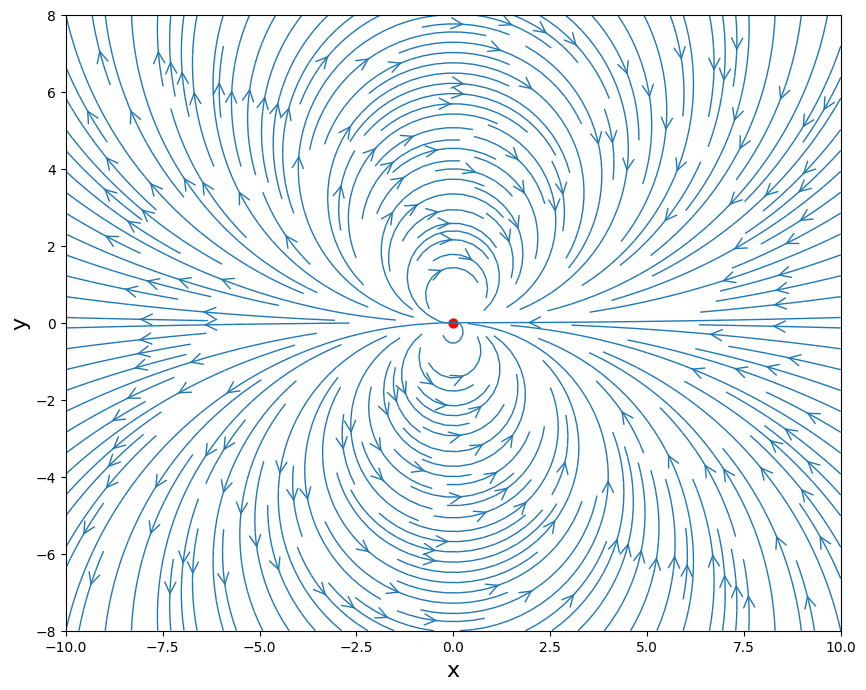

In [13]:
sigma=5 
X_o, Y_o= 0.0, 0.0

a=1
Uinf=1
alfa=0 #en radianes
#Escribo el campo de velocidades

u_dob=-Uinf*a**2*(np.cos(alfa)*(X**2+Y**2)-2*Y**2*np.cos(alfa)+2*X*Y*np.sin(alfa))/((X**2+Y**2)**2)
              
v_dob=Uinf*a**2*(-np.sin(alfa)*(X**2+Y**2)-2*X**2*np.sin(alfa)-2*X*Y*np.cos(alfa))/((X**2+Y**2)**2)
                         
#Ploteo el campo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_dob , v_dob ,
density =2 , linewidth =1 , arrowsize =2 , arrowstyle ="->")
plt.scatter ( X_o , Y_o ,
color = "Red", s=40 , marker ="o");

## Cuerpo semi infinito de Rankine

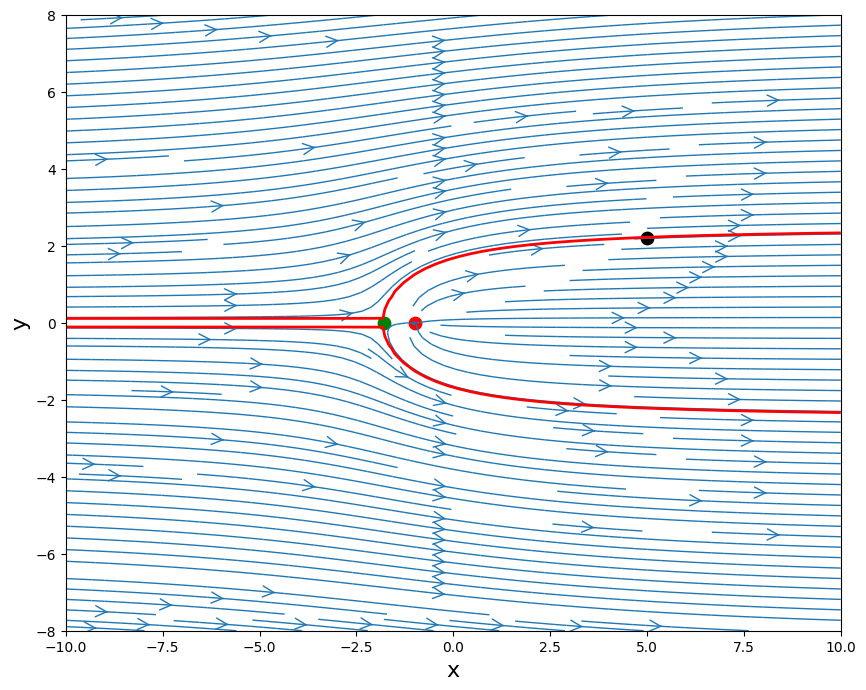

In [14]:
u_rank=u_tras + u_fuente
v_rank=v_tras + v_fuente
psi_rank=psi_tras + psi_fuente

#Punto de estancamiento
x_est=X_fuente-sigma_fuente/(2*np.pi*Uinf)
y_est=Y_fuente
#Ploteo

width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_rank , v_rank ,
density =2 , linewidth =1 , arrowsize =2 , arrowstyle ="->")
plt.scatter ( X_fuente , Y_fuente ,
color = "Red", s=80 , marker ="o");
plt.contour(X,Y,psi_rank,levels=(-sigma/2, sigma/2),colors="Red", linewidths=2, linestyles="solid")
plt.scatter (x_est, y_est, color="Green",s=80, marker="o")
plt.scatter (5,2.2,color="Black",s=80,marker="o")

## Vortice y flujo

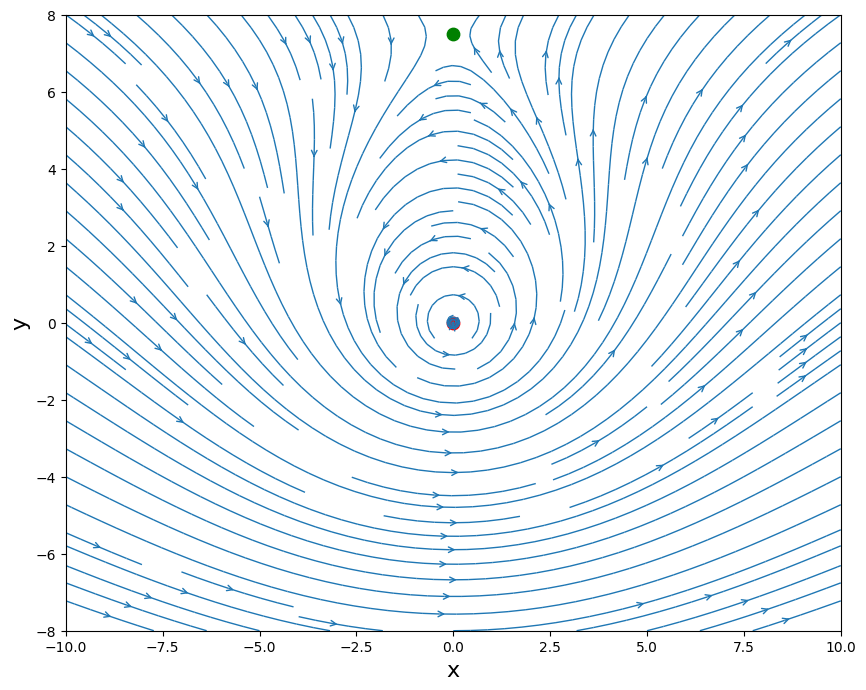

In [15]:
u_comb=u_vort+u_tras
v_comb=v_vort+v_tras

psi_comb=psi_vort+psi_tras

#Punto de estancamiento
x_estmagnus=X_vort
y_estmagnus=Y_vort+gamma/(2*np.pi*Uinf)
#Ploteo
width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_comb , v_comb ,
density =1.5 , linewidth =1 , arrowsize =1 , arrowstyle ="->")
plt.scatter ( X_vort , Y_vort ,
color = "Red", s=80 , marker ="o")
plt.scatter(x_estmagnus,y_estmagnus,color="Green",s=80,marker="o")


+ ## Caso cilindro

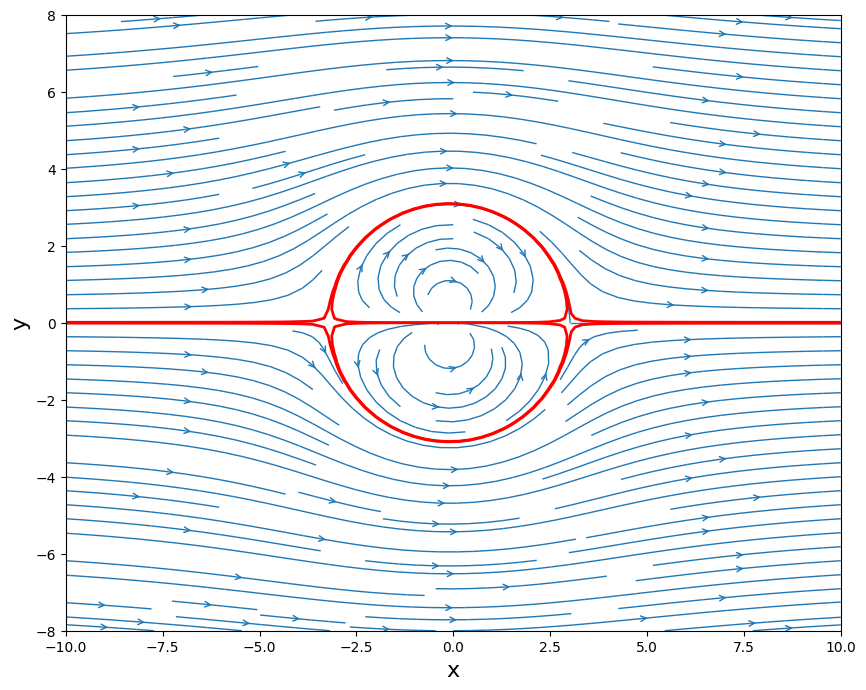

In [16]:
x_f,y_f=-0.2,0.0  #Posición de la fuente
x_s,y_s=0.0,0.0   #Posición del sumidero
intensidad=300
u_fuente, v_fuente=get_velocity_source(X,Y,x_f,y_f,intensidad) 
u_sum,v_sum=get_velocity_source(X,Y,x_s,y_s,-intensidad)
psi_fuente=get_psi_source(X,Y,x_f,y_f,intensidad)
psi_sum=get_psi_source(X,Y,x_s,y_s,-intensidad)

u_cil=u_fuente+u_sum+u_tras
v_cil=v_fuente+v_sum+v_tras
psi_cil=psi_fuente+psi_sum+psi_tras

#Ploteo

width=10
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_cil , v_cil ,
density =1.5 , linewidth =1 , arrowsize =1 , arrowstyle ="->")
plt.contour(X,Y,psi_cil,levels=[-0.01,0.01],colors="Red", linewidths=2, linestyles="solid")

## Calle Benard von Kárman



$$\psi=-\frac{\Gamma}{2\pi}\:Log\left(\frac{\sqrt{sen^2(\pi \frac{x-x_0}{l})\:\: +  \:\: senh^2(\pi \frac{y-y_0}{l})}}{\sqrt{ sen^2(\pi \frac{x-x_0^{´}}{l^{´}})\:\: +  \:\: senh^2(\pi \frac{y-y_0^{´}}{l^{´}})}}\right)$$



In [17]:
import sympy as sp
from sympy import symbols, diff

In [18]:
#Calculo simbolico

x,x0,y,y0,x1,y1,L0,L1, PI = symbols("x,x0,y,y0,x1,y1,L0,L1,PI", real=True)

n= sp.sin(PI*(x-x0)/L0)**2 + sp.sinh(PI*(y-y0)/L0)**2
#d=  sp.sin(PI*(x-x1)/L1)**2 + sp.sinh(PI*(y-y1)/L1)**2

f= sp.ln((sp.sqrt(n)))


u=sp.diff(f,y)
v=sp.diff(f,x)




v


PI*sin(PI*(x - x0)/L0)*cos(PI*(x - x0)/L0)/(L0*(sin(PI*(x - x0)/L0)**2 + sinh(PI*(y - y0)/L0)**2))

In [17]:
u

PI*sinh(PI*(y - y0)/L0)*cosh(PI*(y - y0)/L0)/(L0*(sin(PI*(x - x0)/L0)**2 + sinh(PI*(y - y0)/L0)**2))

In [31]:
#funciones 

def seno(a,b,c):
    return np.sin(np.pi*(a-b)/c)

def cos(a,b,c):
    return np.cos(np.pi*(a-b)/c)

def senh(a,b,c):
    return np.sinh(np.pi*(a-b)/c)

def cosh(a,b,c):
    return np.cosh(np.pi*(a-b)/c)

def get_velocity_karman(gamma,x,x0,y,y0,l0):
    denom=l0*(seno(x,x0,l0)**2 + senh(y,y0,l0)**2)
    num_u=np.pi *  senh(y,y0,l0) * cosh(y,y0,l0)
    
    u= gamma/(2*np.pi)* num_u/denom
    
    num_v= num_u=np.pi *  seno(x,x0,l0) * cos(x,x0,l0)
    v= -gamma/(2*np.pi)* num_v/denom
    
    return u,v


def get_velocity_karman(gamma,x,x0,x1,y,y0,y1,l0,l1):
    denom=l1*(seno(x,x1,l1)**2 + senh(y,y1,l1)**2)
    n1=np.pi*(seno(x,x0,l0)**2 + senh(y,y0,l0)**2) * seno(x,x1,l1) * cos(x,x1,l1)
    n2=np.pi*seno(x,x0,l0) * cos(x,x0,l0)
    
    v= -gamma/(2*np.pi)* ((- n1/denom**2 - n2/denom )* (seno(x,x1,l1)**2 + senh(y,y1,l1)**2)) / (seno(x,x0,l0)**2 + senh(y,y0,l0)**2)
    
    m1=np.pi*(seno(x,x0,l0)**2 + senh(y,y0,l0)**2) * senh(x,x1,l1) * cosh(x,x1,l1)
    m2= np.pi*senh(y,y0,l0) * cosh(y,y0,l0)
    
    u= gamma/(2*np.pi)*((- m1/denom**2 + m2/denom) * (seno(x,x1,l1)**2 + senh(y,y1,l1)**2)) / (seno(x,x0,l0)**2 + senh(y,y0,l0)**2)

    return u,v

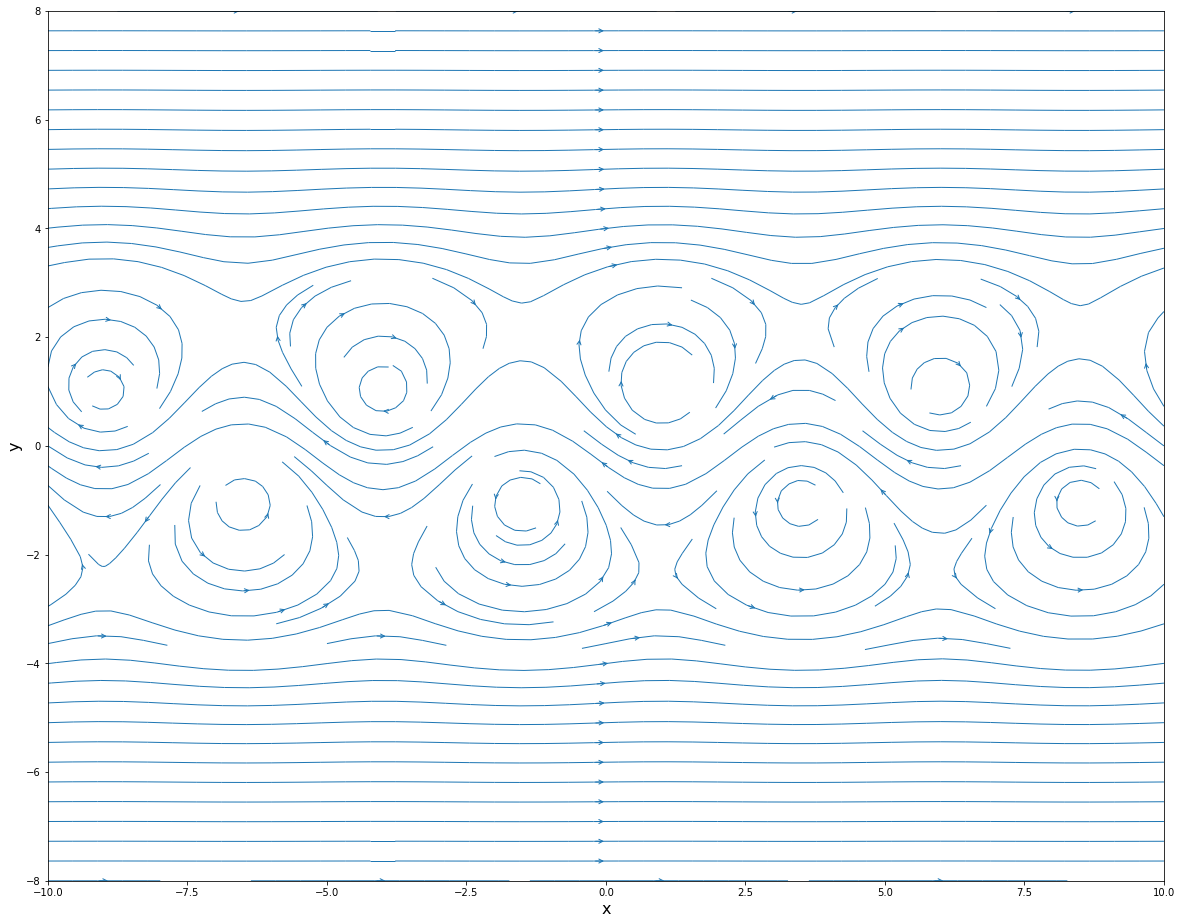

In [33]:
L0=5
X0 , X1 = 1 , 1-L0/2
Y0 , Y1 = 1 , -1

gamma_sup=1.41*20
gamma_inf= -gamma_sup
#u_karman, v_karman =  get_velocity_karman(gamma,X,X0,X1,Y,Y0,Y1,L0,L1)

u_karman_sup, v_karman_sup =  get_velocity_karman(gamma_sup,X,X0,Y,Y0,L0)

u_karman_inf, v_karman_inf =  get_velocity_karman(gamma_inf,X,X1,Y,Y1,L0)


u_plot=u_karman_inf  + u_karman_sup +u_tras
v_plot=v_karman_inf + v_karman_sup
#Ploteo

width=20
height=(y_end-y_start)/(x_end-x_start) * width
plt.figure ( figsize =( width , height ))
plt.xlabel ("x", fontsize =16) # Label eje x
plt.ylabel ("y", fontsize =16) # Label eje y
plt.xlim ( x_start , x_end ) # Rango eje x
plt.ylim ( y_start , y_end ) # Rango eje y

plt.streamplot (X , Y , u_plot , v_plot ,
density =1.5 , linewidth =1 , arrowsize =1 , arrowstyle ="->")